In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [5]:
print(species.head())
print(species.dtypes)
print(species.size)

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
23296


In [72]:
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


In [73]:
print(f"nnumber of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

nnumber of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [43]:
print(observations.head())
print(observations.dtypes)

print(observations.describe())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
scientific_name    object
park_name          object
observations        int64
dtype: object
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


### What is the distribution of conservation_status for animals?

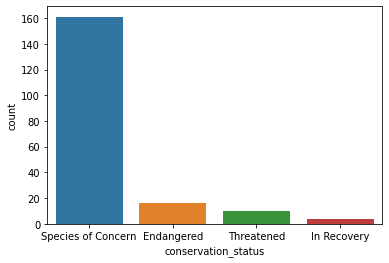

In [29]:
sns.countplot(x='conservation_status', data=species)
plt.show()

In [76]:
species['conservation_status'].value_counts()

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [75]:
print(f"na values:{species.conservation_status.isna().sum()}")

species.fillna('No Intervention', inplace=True)

na values:5633


### Are certain types of species more likely to be endangered?

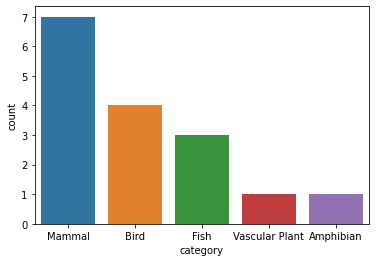

In [77]:
endangered = species[species['conservation_status']=='Endangered']

sns.countplot(x='category', data=endangered)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Are the differences between species and their conservation status significant?

In [78]:
Xtab = pd.crosstab(species['category'],species['conservation_status'])
print(Xtab)
chi2, pval, dof, expected = chi2_contingency(Xtab)

print(pval)
#The null hypothesis is that the relatinonship between species and conserv_status is not significant
#pval less than 0.05, so we can reject the null hypothesis

conservation_status  Endangered  In Recovery  No Intervention  \
category                                                        
Amphibian                     1            0               73   
Bird                          4            3              442   
Fish                          3            0              116   
Mammal                        7            1              176   
Nonvascular Plant             0            0              328   
Reptile                       0            0               74   
Vascular Plant                1            0             4424   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                             4           2  
Bird                                 72           0  
Fish                                  4           4  
Mammal                               28           2  
Nonvascular Plant                     5           0  
Reptile                             

### Which species were spotted the most at each park?

In [41]:
print(species['scientific_name'].unique())
print(observations['scientific_name'].unique())

['Clethrionomys gapperi gapperi' 'Bos bison' 'Bos taurus' ...
 'Parthenocissus vitacea' 'Vitis californica' 'Tribulus terrestris']
['Vicia benghalensis' 'Neovison vison' 'Prunus subcordata' ...
 'Ranunculus hebecarpus' 'Gulo gulo' 'Dichanthelium depauperatum']


In [42]:
result = pd.merge(observations, species, how="left", on=["scientific_name"])
result

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN
...,...,...,...,...,...,...
25627,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,NaN
25628,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,NaN
25629,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,NaN
25630,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,NaN


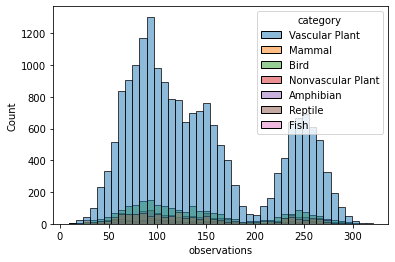

In [71]:
sns.histplot(data=result, x="observations",alpha=.5, hue="category")

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend(handles=[p1, p2], title='title', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()